In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

## Create the data path

In [2]:
from pathlib import Path
data_path = Path('./dataset')
data_path

PosixPath('dataset')

In [3]:
data_path.ls()

[PosixPath('dataset/.DS_Store'),
 PosixPath('dataset/test'),
 PosixPath('dataset/train')]

## Create ImageDataBunch

In [4]:
train_path = data_path/"train"

In [5]:
fnames = get_image_files(train_path)
fnames[:4]

[PosixPath('dataset/train/stop_6.jpg'),
 PosixPath('dataset/train/stop_7.jpg'),
 PosixPath('dataset/train/stop_5.jpg'),
 PosixPath('dataset/train/stop_4.jpg')]

In [6]:
# still to find the reason for this but the result did change
np.random.seed(2)

In [7]:
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
data = ImageDataBunch.from_name_re(train_path, fnames, pat, ds_tfms=get_transforms(do_flip=False), size=244, bs=16)

In [9]:
# normalize the data, NEVER FORGET THIS
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (24 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
stop,stop,stop,stop,wrong
Path: dataset/train;

Valid: LabelList (6 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
stop,stop,yield,yield,stop
Path: dataset/train;

Test: None

## Check the data, get familiar with it, also the data classes we're going to play with
    

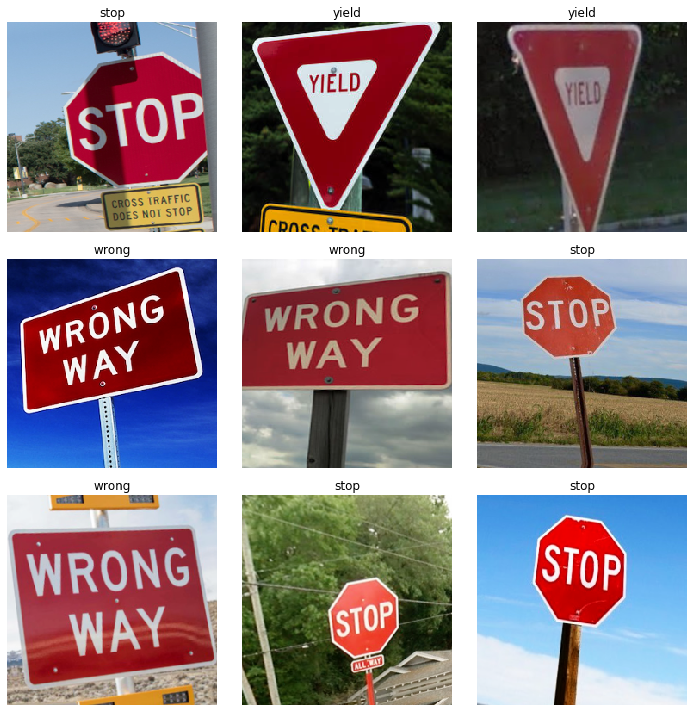

In [10]:
data.show_batch(3, figsize=(10,10))

In [11]:
data.classes

['stop', 'wrong', 'yield']

## We're ready to train, start learning

In [12]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

In [13]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.984779,5.705746,0.833333,00:06
1,1.826531,3.706829,0.666667,00:06
2,1.370491,2.688343,0.666667,00:06
3,1.047034,2.091217,0.666667,00:06


In [14]:
learner.save('checkpoint-1')

## Lets see where we went wrong

In [15]:
interp = ClassificationInterpretation.from_learner(learner)

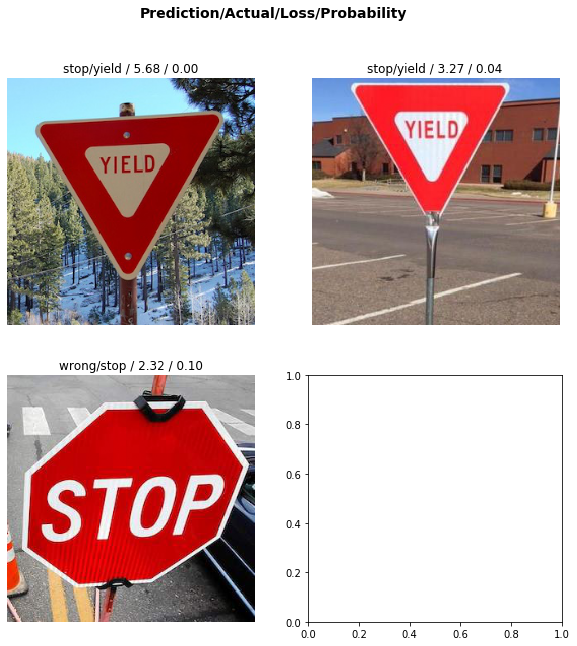

In [16]:
interp.plot_top_losses(3, figsize=(10, 10))

In [17]:
interp.most_confused()

[('yield', 'stop', 2), ('stop', 'wrong', 1), ('wrong', 'stop', 1)]

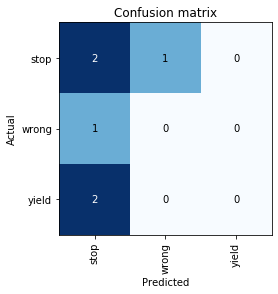

In [18]:
interp.plot_confusion_matrix()

In [19]:
len(fnames)

30

In [20]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


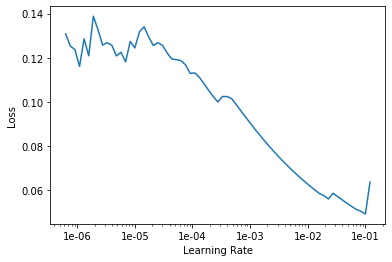

In [21]:
learner.recorder.plot()

In [22]:
learner.unfreeze()
learner.fit_one_cycle(2, max_lr=slice(1e-017, 1e-007))

epoch,train_loss,valid_loss,error_rate,time
0,0.089472,1.602187,0.500000,00:08
1,0.066414,1.288511,0.500000,00:08


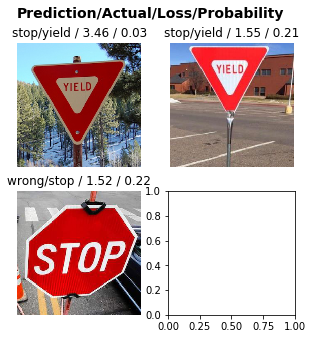

In [23]:
interp_after_unfreeze = ClassificationInterpretation.from_learner(learner)
interp_after_unfreeze.most_confused()
interp_after_unfreeze.plot_top_losses(3, figsize=(5,5))

## Predict our test files

In [24]:
all_test_files = get_image_files(data_path/"test")
all_test_files

[PosixPath('dataset/test/stop_0.jpg'),
 PosixPath('dataset/test/stop_1.jpg'),
 PosixPath('dataset/test/wrong_0.jpg'),
 PosixPath('dataset/test/yield_1.jpg'),
 PosixPath('dataset/test/yield_0.jpg'),
 PosixPath('dataset/test/wrong_1.jpg')]

In [25]:
for test_file in all_test_files:
    res = learner.predict(open_image(test_file))
    print(res, test_file)

(Category wrong, tensor(1), tensor([0.1536, 0.8455, 0.0009])) dataset/test/stop_0.jpg
(Category stop, tensor(0), tensor([8.4837e-01, 1.5141e-01, 2.1710e-04])) dataset/test/stop_1.jpg
(Category wrong, tensor(1), tensor([0.0262, 0.9596, 0.0142])) dataset/test/wrong_0.jpg
(Category stop, tensor(0), tensor([0.5457, 0.2123, 0.2420])) dataset/test/yield_1.jpg
(Category yield, tensor(2), tensor([0.4692, 0.0251, 0.5057])) dataset/test/yield_0.jpg
(Category wrong, tensor(1), tensor([0.3483, 0.6455, 0.0062])) dataset/test/wrong_1.jpg


### DONE!!

## Trying ResNet50

In [26]:
learner50 = cnn_learner(data, models.resnet50, metrics=error_rate)

In [27]:
learner50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.712495,3.078593,0.666667,00:11
1,2.506593,0.249855,0.000000,00:12
2,1.659579,0.682911,0.333333,00:12
3,1.234096,0.579436,0.333333,00:12


In [28]:
interp50 = ClassificationInterpretation.from_learner(learner50)

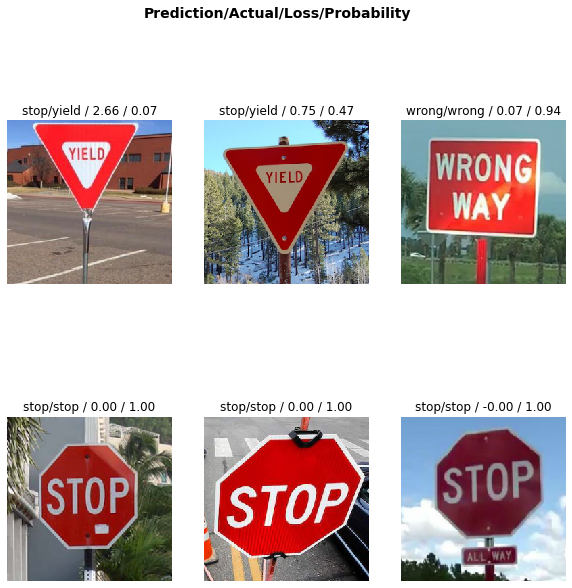

In [29]:
interp50.plot_top_losses(6, figsize=(10, 10))

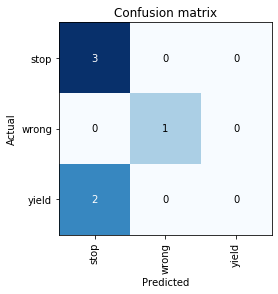

In [30]:
interp50.plot_confusion_matrix()